# K-Means Cluster: Mall Customer Segmentation 

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
#rename variables
df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [11]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df.shape

(200, 5)

In [14]:
df.isnull().values.any()          #checking null values

False

In [15]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\rabiu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


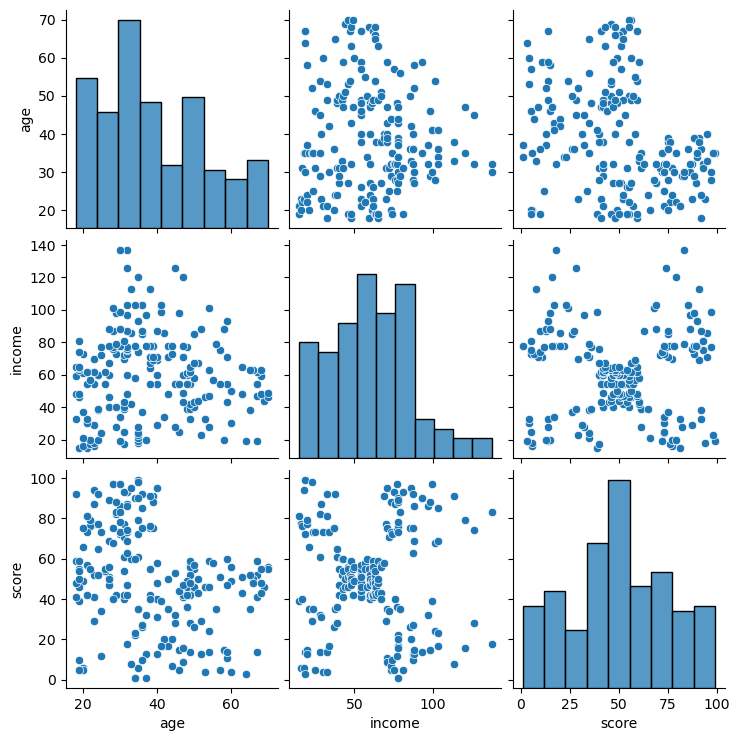

In [16]:
seaborn.pairplot(df[['age','income','score']])

In [17]:
import sklearn.cluster as cluster

#### Score vs Income Clustering

In [19]:
kmeans=cluster.KMeans(n_clusters=5)

In [24]:
kmeans=kmeans.fit(df[['income','score']])

C:\Users\rabiu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rabiu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

In [26]:
df['income_cluster']=kmeans.labels_

In [27]:
df

,CustomerID,gender,age,income,score,income_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [28]:
df['income_cluster'].value_counts()

income_cluster
0    81
1    39
4    35
2    23
3    22
Name: count, dtype: int64

Text(0.5, 1.0, 'Income vs Score')

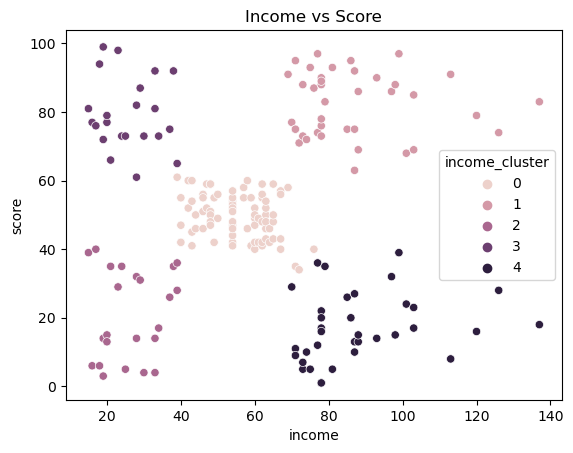

In [32]:
seaborn.scatterplot(x='income', y='score', hue='income_cluster', data=df)
plt.title('Income vs Score')

In [43]:
df

,CustomerID,gender,age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,2,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,4,0
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,4,0


In [44]:
df['age_cluster'].value_counts()

age_cluster
0    115
1     85
Name: count, dtype: int64

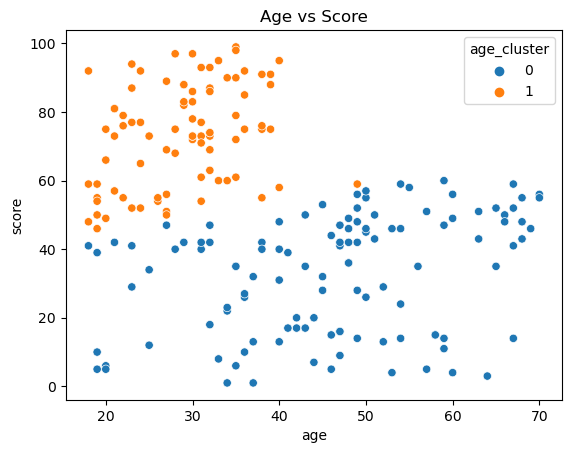

In [56]:
seaborn.scatterplot(x='age', y='score', hue='age_cluster', data=df)
plt.title('Age vs Score')
plt.savefig('Age_vs_score.png')